# Data Cleaning

In [70]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('ggplot')

In [2]:
torre_me = '../../database/torrePozoIzquierdo_JUL_AGO_2004/torreME.txt'
torre_ms = '../../database/torrePozoIzquierdo_JUL_AGO_2004/torreMS.txt'

## Torre ME

In [3]:
parse = lambda x: pd.datetime.strptime(x, '%d/%m/%Y %H:%M:%S')
df_torre_me = pd.read_csv(torre_me, skiprows=12,  
                          delim_whitespace=True, 
                          header=None, 
                          names=['day', 'time', 'direccion_viento', 'v_h10', 'v_h20', 'v_h40'],
                          parse_dates=[['day', 'time']], 
                          date_parser=parse,
                          index_col=0)

In [4]:
df_torre_me.head()

,direccion_viento,v_h10,v_h20,v_h40
day_time,,,,
2004-07-01 00:00:00,55.0,9.3,9.9,9.6
2004-07-01 00:01:00,54.0,8.7,9.4,9.6
2004-07-01 00:02:00,54.0,8.7,9.3,9.8
2004-07-01 00:03:00,53.0,8.8,9.3,9.6
2004-07-01 00:04:00,52.0,9.9,10.4,10.2


In [49]:
df_torre_me.shape

(87123, 4)

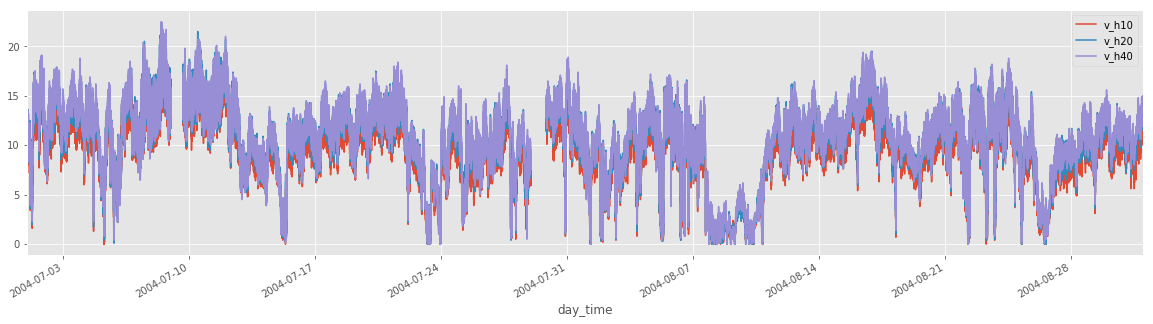

In [6]:
df_torre_me[['v_h10', 'v_h20', 'v_h40']].plot(figsize=(20,5));

In [11]:
# null 
df_null = df_torre_me[df_torre_me.isnull().any(axis=1)]

In [12]:
df_null

,direccion_viento,v_h10,v_h20,v_h40
day_time,,,,
2004-07-09 00:01:00,NaN,NaN,NaN,NaN
2004-07-29 00:01:00,NaN,NaN,NaN,NaN


In [39]:
df_torre_me.loc[df_torre_me.index >= '2004-07-09 00:00:00'].head(10)

,direccion_viento,v_h10,v_h20,v_h40
day_time,,,,
2004-07-09 00:00:00,63.0,12.4,13.1,13.5
2004-07-09 00:01:00,NaN,NaN,NaN,NaN
2004-07-09 15:55:00,66.0,16.6,16.6,15.3
2004-07-09 15:56:00,65.0,15.2,15.7,15.1
2004-07-09 15:57:00,66.0,14.0,14.2,14.2
2004-07-09 15:58:00,60.0,14.6,15.5,14.9
2004-07-09 15:59:00,63.0,14.2,15.1,15.3
2004-07-09 16:00:00,61.0,14.5,15.7,15.3
2004-07-09 16:01:00,66.0,13.9,14.2,13.8


In [40]:
df_torre_me.loc[df_torre_me.index >= '2004-07-29 00:01:00'].head(10)

,direccion_viento,v_h10,v_h20,v_h40
day_time,,,,
2004-07-29 00:01:00,NaN,NaN,NaN,NaN
2004-07-29 20:05:00,54.0,12.7,13.3,13.6
2004-07-29 20:06:00,52.0,12.0,13.2,13.6
2004-07-29 20:07:00,52.0,11.8,13.0,13.4
2004-07-29 20:08:00,53.0,12.8,13.5,13.6
2004-07-29 20:09:00,50.0,12.7,13.3,13.7
2004-07-29 20:10:00,49.0,12.8,13.3,13.8
2004-07-29 20:11:00,52.0,12.6,13.2,13.6
2004-07-29 20:12:00,50.0,12.6,13.3,14.3


In [43]:
# create a reañl time index to merge
print(df_torre_me.index[0])
print(df_torre_me.index[-1])

2004-07-01 00:00:00
2004-08-31 23:58:00


In [47]:
real_index = pd.date_range('2004-07-01 00:00:00', '2004-08-31 23:58:00', freq="1min")
real_index

DatetimeIndex(['2004-07-01 00:00:00', '2004-07-01 00:01:00',
               '2004-07-01 00:02:00', '2004-07-01 00:03:00',
               '2004-07-01 00:04:00', '2004-07-01 00:05:00',
               '2004-07-01 00:06:00', '2004-07-01 00:07:00',
               '2004-07-01 00:08:00', '2004-07-01 00:09:00',
               ...
               '2004-08-31 23:49:00', '2004-08-31 23:50:00',
               '2004-08-31 23:51:00', '2004-08-31 23:52:00',
               '2004-08-31 23:53:00', '2004-08-31 23:54:00',
               '2004-08-31 23:55:00', '2004-08-31 23:56:00',
               '2004-08-31 23:57:00', '2004-08-31 23:58:00'],
              dtype='datetime64[ns]', length=89279, freq='T')

In [48]:
len(real_index)

89279

El dataset original tiene **87123** registros pero el índice real **89279**. Faltan **2156** registros.

In [50]:
89279 - 87123

2156

### Cómo identificar valores nulos de medida

In [55]:
true_index = pd.date_range('2004-07-01 00:00:00', '2004-07-01 00:05:00', freq="1min")
true_df = pd.DataFrame(index=true_index)
true_df

""
2004-07-01 00:00:00
2004-07-01 00:01:00
2004-07-01 00:02:00
2004-07-01 00:03:00
2004-07-01 00:04:00
2004-07-01 00:05:00


In [60]:
worng_index = pd.date_range('2004-07-01 00:00:00', '2004-07-01 00:02:00', freq="1min")
worng_df = pd.DataFrame([2,3,7], columns=['t'], index=worng_index)
worng_df

,t
2004-07-01 00:00:00,2
2004-07-01 00:01:00,3
2004-07-01 00:02:00,7


In [62]:
df_join = pd.concat([true_df, worng_df], axis=1, join='outer')
df_join

,t
2004-07-01 00:00:00,2.0
2004-07-01 00:01:00,3.0
2004-07-01 00:02:00,7.0
2004-07-01 00:03:00,NaN
2004-07-01 00:04:00,NaN
2004-07-01 00:05:00,NaN


In [63]:
df_join[df_join.isnull().any(axis=1)]

,t
2004-07-01 00:03:00,NaN
2004-07-01 00:04:00,NaN
2004-07-01 00:05:00,NaN


In [66]:
index_null = df_join[df_join.isnull().any(axis=1)].index
for i in index_null:
    print(i)

2004-07-01 00:03:00
2004-07-01 00:04:00
2004-07-01 00:05:00


### * Seleccionar las mismas horas para un interpolar un valor no medido a partir de otros

In [75]:
index = pd.date_range('2004-07-01 00:00:00', '2004-07-10 00:00:00', freq="1min")
df = pd.DataFrame(np.random.randn(len(index)), columns=['values'], index=index)
df.head()

,values
2004-07-01 00:00:00,0.908371
2004-07-01 00:01:00,0.039301
2004-07-01 00:02:00,-0.804319
2004-07-01 00:03:00,1.111397
2004-07-01 00:04:00,-1.095581


In [81]:
df.loc['2004-07-05 00:05:00'] = np.nan

In [155]:
worng_index = df[df.isnull().any(axis=1)].index
worng_index

DatetimeIndex(['2004-07-01 00:04:00', '2004-07-05 00:05:00'], dtype='datetime64[ns]', freq='5761T')

In [147]:
df.loc[worng_index[1]] 

values   NaN
Name: 2004-07-05 00:05:00, dtype: float64

In [179]:
worng_index[1]

Timestamp('2004-07-05 00:05:00', freq='5761T')

In [173]:
worng_day = worng_index[1].day
worng_day_start = worng_day - 4
worng_day_end= worng_day + 4

In [175]:
worng_index[1] + 

Timestamp('2004-07-05 00:05:00', freq='5761T')